<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 <br>
<font color=696880 size=4>

**Name:** ***AmirMahdi Daraei***

**Student Number:** ***99105431***


# LFP data

What is LFP (Local Field Potential) signal? Explain briefly  (5 points)

Your answer:

***A Local Field Potential (LFP) refers to the extracellular electrical activity recorded from a group of neurons in a specific brain region. It represents the collective synaptic inputs and outputs generated by nearby neurons within a localized area of the brain.***

***LFPs capture the combined electrical activity of nearby neurons, giving us a glimpse into what's happening in a specific brain region.***

*   **Electrical whispers**: LFPs are weak electrical signals measured in the spaces between brain cells.

*   **Synaptic whispers**: LFPs reflect the electrical currents from synapses (the connections between neurons) rather than the individual firing of neurons themselves. LFPs provide a different perspective on brain activity compared to recording single neuron spikes.

*   **Localization**: They are local because they are only picked up by electrodes placed very close to the active neurons.

***LFPs are valuable tools in neuroscience research, offering a means to study network-level activity, neuronal synchronization, and information processing in the brain.***

What is Gamma frequency entrainment? Explain (5 points)

Your answer:

***Gamma frequency entrainment, which refers to the synchronization of neural oscillations in the gamma frequency range (30-100 Hz), plays a significant role in various cognitive processes and sensory perception. It occurs when the brain's oscillatory activity aligns with external stimuli or internal cognitive tasks.
One area where gamma frequency entrainment is observed is working memory, where it is enhanced during tasks that require actively maintaining and manipulating information. This entrainment supports the efficient functioning of working memory processes.
Gamma oscillations also contribute to attentional processes. When individuals selectively attend to specific stimuli or locations, gamma oscillations in the corresponding brain regions increase in power and become more synchronized, facilitating focused attention.
In terms of sensory perception, gamma frequency entrainment is involved in different domains. For instance, in visual perception, gamma oscillations are associated with processing visual stimuli and integrating different visual features into a coherent percept. The strength and timing of gamma oscillations influence visual perception.
Language processing is another cognitive domain influenced by gamma frequency entrainment. During language-related tasks, such as speech comprehension and production, gamma oscillations support the integration of linguistic components and the coordination of relevant neural networks.
Furthermore, gamma oscillations contribute to sensorimotor integration, which involves coordinating sensory inputs and motor outputs. When tasks require sensorimotor integration, gamma frequency entrainment facilitates the integration of sensory information with motor planning and execution.
By studying gamma frequency entrainment, researchers gain insights into the functional connectivity and coordination of neural networks in the brain. This understanding enhances our knowledge of brain function and its implications for cognitive processes and sensory perception.***

Study about Gamma frequency entrainment's effect on the subject. Explain how it affects the brain. (This article could be useful: Gamma frequency entrainment attenuats amyloid load and modifies microglia)  (5 points)


Your answer:

***Based on the search results for "Gamma frequency entrainment attenuates amyloid load and modifies microglia article," it appears that there is a study investigating the effects of gamma frequency entrainment on amyloid load and microglia in mice. Here is a summary of the findings:
Experimental Setup:
Mice were placed in a virtual reality environment.
Local field potentials (LFP) were recorded in the CA1 region of the hippocampus.
LFP signals were filtered for theta, sharp wave ripples (SWRs), and gamma frequencies.
Gamma Power in 5XFAD Mice:
5XFAD mice, a model of Alzheimer's disease, showed reduced power in the gamma frequency range during SWRs compared to wild-type (WT) mice.The gamma band refers to a range of frequencies around 40 Hz, often called "slow gamma" .The distribution of gamma frequencies during SWRs in 5XFAD mice clustered around 40 Hz.The cumulative distribution of gamma power during large SWRs was significantly smaller in 5XFAD mice compared to WT mice.
Microglia and Gamma Entrainment:
Microglia, the immune cells of the brain, play a role in the clearance of amyloid plaques associated with Alzheimer's disease.
Gamma frequency entrainment had an impact on microglia activity and amyloid load.
The study did not provide specific details about the modifications in microglia or the mechanisms involved.***


There is an LFP_data file in the zip file, which is located in the CW. This data is related to an experiment with 120 trials and 3 different brain regions of a rat. Each trial consists of 6000 samples, and the sample rate is 2000, resulting in 3 seconds of data per trial. Within this file, there is a channelData matrix that contains recorded data for each region. Additionally, there is a digitalByte vector that specifies when trials began and ended using pulses with an amplitude of 128. Open the file, print the size of the digitalByte and channelData, and then plot the digitalByte.  (5 points)

In [112]:
# import all the necessary libraries here
import numpy as np
import scipy.io as spio
from scipy.signal import butter, filtfilt, hilbert, welch, csd
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [113]:
# Load the data from the file provided
#############################
mat_data = spio.loadmat('sessionData.mat')

# Extract necessary data
sample_rate = mat_data['SampleRate'][0][0]
digital_byte = mat_data['digitalByte']
channel_data = mat_data['channelData']
time = mat_data['time'].squeeze()

# Print the SampleRate
print("SampleRate:", sample_rate)

# Print the size of digitalByte
print("Shape of digitalByte:", digital_byte.shape)

# Print the size of channelData
print("Shape of channelData:", channel_data.shape)
#############################

SampleRate: 2000
Shape of digitalByte: (1495741, 1)
Shape of channelData: (1495741, 3)


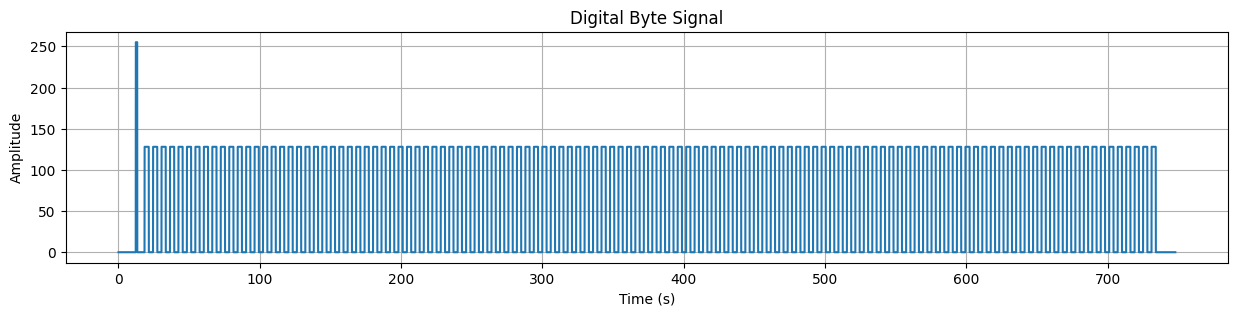

In [114]:
# Plot the digitalByte
plt.figure(figsize=(15, 3))
plt.plot(time.squeeze(), digital_byte)
plt.title('Digital Byte Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Pre-processing of the data

Now we want to pre process our data. Follow the following steps and explain why we do them:  (points 20)

1. Apply a bandpass filter in the range 1-300 Hz on the signal of each region.

2. Convert the signal to 120 stimulus trials using digitalByte.

3. Apply z-score normalization on each trial.

In [115]:
def bandpass_filter(data, low_freq, high_freq):
    """
    Apply a bandpass filter to the data.

    Parameters:
    - data: Array of data to be filtered.
    - low_freq: Low frequency cut-off for the bandpass filter.
    - high_freq: High frequency cut-off for the bandpass filter.
    - sample_rate: Sampling rate of the data.

    Returns:
    - Filtered data.
    """
    nyquist = 0.5 * sample_rate
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = butter(5, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data


def convert_to_trials(data):
    """
    Extract 120 trials from the signal data based on the digitalByte signal.

    Parameters:
    - data: Continuous signal data.
    - digital_byte: Digital byte signal indicating trial starts.
    - expected_trials: The expected number of trials to extract.

    Returns:
    - A list of arrays, each containing data for one trial.
    """
    trials = []
    trial_starts = []

    # Identify trial starts
    for i in range(1, len(digital_byte)):
        if digital_byte[i] != 0 and digital_byte[i-1] == 0:  # Transition from 0 to non-zero value
            trial_starts.append(i)

    # Verify we have the expected number of trials
    if len(trial_starts) - 120 > 1:
        raise ValueError(f"Expected {120} trials, but found {len(trial_starts)}.")

    duration_seconds = 3  # duration of each trial in seconds
    trial_length = sample_rate * duration_seconds

    for start_index in trial_starts:
        # Placeholder for extracting a trial
        # Adjust the length of a trial as needed based on your data specifics
        trial_end_index = start_index + trial_length  # You'll need to define trial_length
        trials.append(data[start_index:trial_end_index])

    return trials



def z_score(data):
    """
    Calculate the z-score for the data.

    Parameters:
    - data: Array of data to normalize.

    Returns:
    - Normalized data with z-score applied.
    """
    z_data = (data - np.mean(data)) / np.std(data)
    return z_data


hippocampus_signal = channel_data[:, 0]
mPFC_signal = channel_data[:, 1]
ventral_straitum_signal = channel_data[:, 2]
regions = [(1, 'Hippocampus'), (2, 'mPFC'), (3, 'Ventral Straitum')]
region_signals = [hippocampus_signal, mPFC_signal, ventral_straitum_signal]

region_filtered_signals = []
region_trials = []
region_normalized_trials = []
for region_signal in region_signals:
    filtered_signal = bandpass_filter(region_signal, 1, 300)
    region_filtered_signals.append(filtered_signal)
    trials = convert_to_trials(filtered_signal)
    region_trials.append(trials)
    normalized_trials = [z_score(trial) for trial in trials]
    region_normalized_trials.append(normalized_trials)

 The three regions represented in the data, respectively, are the Hippocampus, the mPFC (medial Prefrontal Cortex), and the Ventral Striatum. Explain functionality of these regions briefly.  (10 points)

**Your answer:**

1. ***Hippocampus:***

The hippocampus is a brain region that holds great significance in various cognitive processes, particularly in memory formation and spatial navigation. It plays a vital role in encoding and retrieving memories, both short-term and long-term. Additionally, the hippocampus contributes to our ability to navigate through space and create mental maps of our surroundings. It also participates in learning, emotional regulation, and the consolidation of memories from temporary storage to more permanent storage.

2. ***mPFC (medial Prefrontal Cortex):***

The medial prefrontal cortex, situated in the frontal lobe of the brain, is involved in a diverse array of higher-level cognitive functions. It plays a crucial role in decision-making, executive functions, and social behavior. The mPFC assists in evaluating potential rewards and risks, making choices, and maintaining goals. Furthermore, it contributes to self-awareness, emotional control, and our ability to understand and interact with others in social contexts.

3. ***Ventral Striatum:***

The ventral striatum, encompassing structures like the nucleus accumbens, is a component of the basal ganglia deep within the brain. It is primarily associated with the brain's reward system and plays a pivotal role in motivation, reinforcement learning, and the experience of pleasure. The ventral striatum is responsible for processing rewarding stimuli, such as food, sexual interactions, and social connections. Additionally, it contributes to the generation of positive emotions and the formation of habitual behaviors.
It's important to acknowledge that these brain regions operate in intricate networks and collaborate with other regions to support complex cognitive functions and behaviors. The descriptions provided here offer a brief glimpse into their functionalities, but each region is involved in a wide range of additional processes and interactions within the complex landscape of the brain.

What is ERP of a neural signal ? Calculate the ERP of given data for each region and plot it(set title for x, y axes.)  (10 points)

Your answer:

***Event-Related Potentials (ERPs) are electrical signals in the brain that occur in response to specific events or stimuli. They reflect the brain's activity during sensory, cognitive, or motor processes.
To obtain ERPs, researchers analyze the electrical signals recorded by an electroencephalogram (EEG) from multiple trials or repetitions of the same task or stimulus. By averaging these signals, researchers can separate the brain's response to the specific event or stimulus from background noise.***

***ERPs are characterized by distinctive patterns of positive and negative deflections in the EEG waveform, known as components. Each component corresponds to a different stage of information processing and is labeled with letters or abbreviations, such as P1, N2, or P300, indicating its specific properties.
The timing and magnitude of ERP components provide valuable insights into the cognitive processes and neural mechanisms involved in perception, attention, memory, language processing, and other mental functions. ERPs are used by researchers to investigate various aspects of brain function, including sensory and cognitive processes, emotional responses, and the effects of disorders or interventions on brain activity.***

***ERPs are particularly valuable in experimental settings where researchers can manipulate and control the timing and presentation of stimuli. This allows them to examine how the brain responds to specific events or conditions. By studying ERPs, researchers gain a non-invasive understanding of the timing and dynamics of neural processing, and they gain important information about how the brain responds to different stimuli and cognitive tasks.***

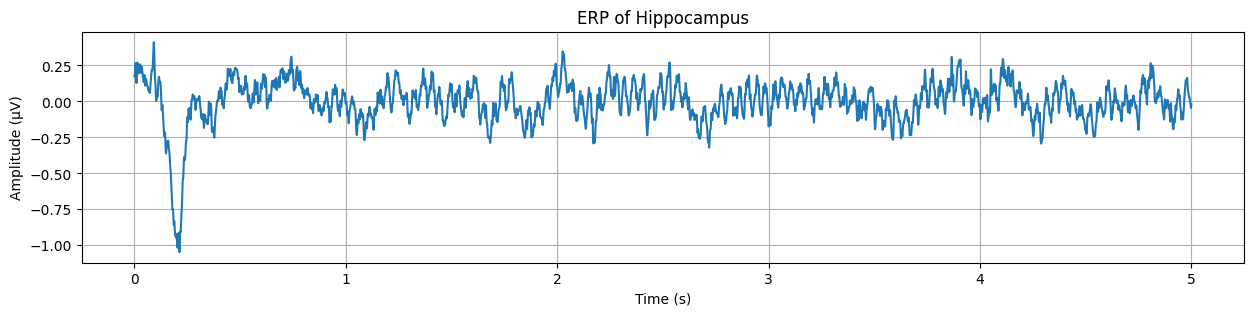

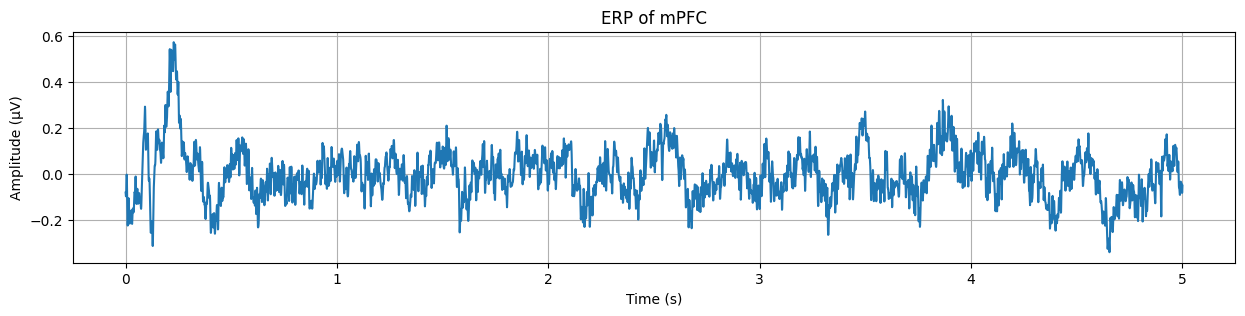

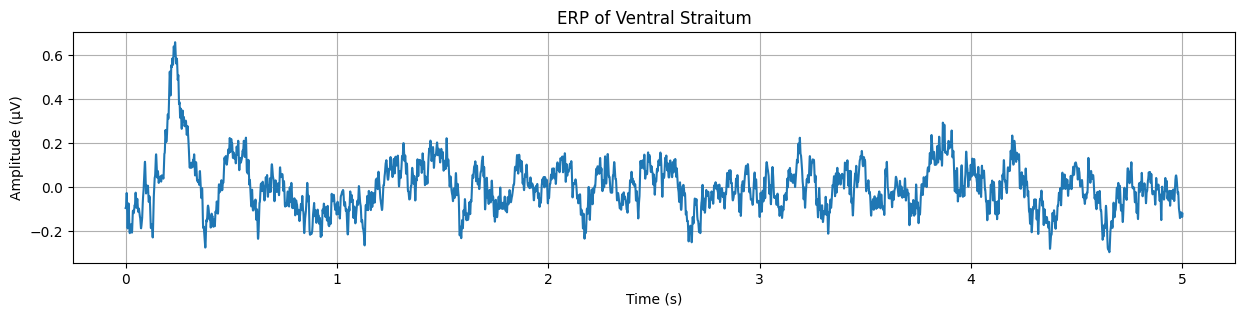

In [116]:
def ERP_calc(data):
    """
    Calculate the Event-Related Potential (ERP) of the data.

    Parameters:
    - data: A list of arrays, each array is data from one trial.

    Returns:
    - The ERP of the data, calculated as the mean across trials.
    """
    erp = np.mean(data, axis=0)
    return erp

i = 0
for region in region_normalized_trials:
    erp_data = ERP_calc(region)
    time_vector = np.linspace(0, 5.0, erp_data.shape[0])  # Example: from 0ms to 5000ms around the event

    plt.figure(figsize=(15, 3))
    plt.plot(time_vector, erp_data)
    plt.title(f'ERP of {regions[i][1]}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (μV)')
    plt.grid(True)
    plt.show()
    i += 1


# Entrainment and some processing techniques

Now we want to observe the effect of the entrainment on the LFP signal.

1. Write a function which takes a signal and it's respective sample rate and calculate it's PSD. (Hint: You can use some specific modules of the mentioned libraries.)

2. Write a function that takes the trials of a signal, calculates the PSD (using part 1) of each trial, and averages these PSDs. We refer to this averaged PSD as the ERSP. Draw ERSP  of Hippocampus, mPFC and Ventral Striatum (set legend, x and y title.) Explain your results.  (20 points)

In [117]:
def PSD(data):
    """
    Calculate the Power Spectral Density (PSD) of the data.

    Parameters:
    - data: The signal data.

    Returns:
    - f: Array of sample frequencies.
    - S: Power spectral density of data.
    """
    f, S = welch(data, sample_rate, nperseg=1024)

    return f, S

def ERSP(trials):
    """
    Calculate the Event-Related Spectral Perturbation (ERSP) from a set of trials.

    Parameters:
    - trials: A list of signal arrays, each representing a trial.
    - sample_rate: The sampling rate of the data.

    Returns:
    - f: Array of sample frequencies.
    - ERSP_mean: Average Power Spectral Density across trials.
    """
    # Initialize an empty list to store the PSDs for all trials
    psds = []

    # Loop over each trial and calculate its PSD
    for trial in trials:
        f, S = PSD(trial)
        psds.append(S)

    # Convert list of PSDs to a numpy array for easier computation
    psds = np.array(psds)

    # Calculate the average PSD across all trials (ERSP)
    ERSP_mean = np.mean(psds, axis=0)

    return f, ERSP_mean

Draw PSD of ERP for each region and compare results to ERSPs.(PSDs should be in the same plot. Set legend and proper labels)  (10 points)

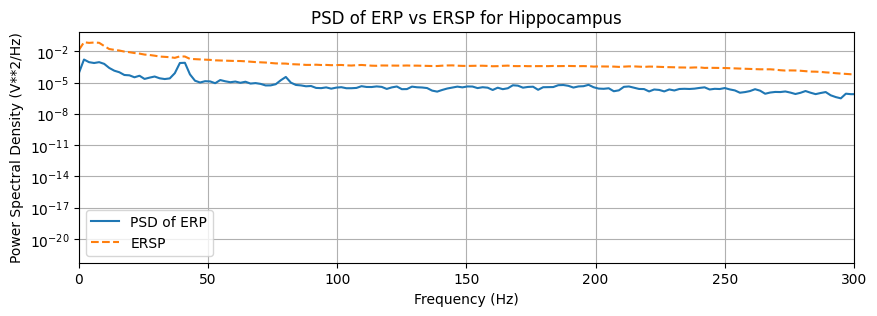

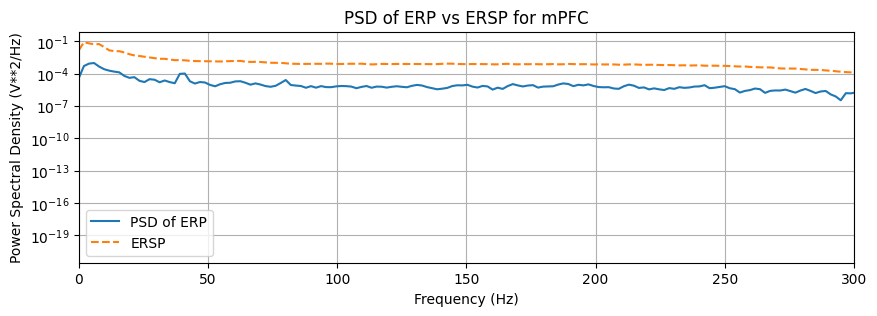

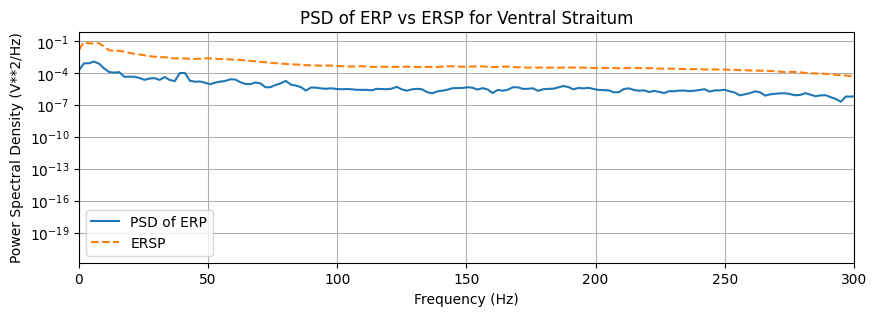

In [118]:
#ERSPs vs PSD of ERPs
#############################

i = 0
for region in region_normalized_trials:
    f_erp, S_erp = PSD(ERP_calc(region))
    f_ersp, Pxx_ersp = ERSP(region)

    plt.figure(figsize=(10, 3))

    plt.semilogy(f_erp, S_erp, label='PSD of ERP')
    plt.semilogy(f_ersp, Pxx_ersp, label='ERSP', linestyle='--')
    plt.title(f'PSD of ERP vs ERSP for {regions[i][1]}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (V**2/Hz)')
    plt.xlim(0, 300)
    plt.legend()
    plt.grid(True)
    plt.show()

    i += 1
#############################

Functional connectivity (FC) refers to the temporal correlations between spatially remote neurophysiological events. In simpler terms, it’s about how different brain regions communicate and synchronize their activity. Phase-phase coupling is one of the most important types of the FC. Study about PLV and PLI, explain how they are work and compare them. (This article could be useful: Phase lag index: Assessment of functional connectivity from multi channel EEG and MEG with diminished bias from common sources. in this article PLV mentioned as mean phase coherency)  (10 points)

Your answer:

***Phase Locking Value (PLV) and Phase Lag Index (PLI) are both measures used in functional connectivity analysis of EEG signals. These measures aim to assess the synchronization or connectivity between different brain regions based on the phase differences of their electrical activity.***


1. ***Phase Locking Value (PLV):***

PLV focuses on the phase differences between signals and disregards their amplitudes.
It reflects the stability or consistency of phase differences across EEG time segments or trials.
PLV can identify when two sensors detect the same phase of a neuronal source simultaneously, indicating potential volume conduction effects.
However, PLV may discard genuine interactions and underestimate connectivity at small time lags and low signal-to-noise ratios .
PLV does not provide information about the direction of interaction between brain regions .

2. ***Phase Lag Index (PLI):***

PLI was introduced to exclude volume conduction effects by disregarding phase locking centered around 0 phase difference.
It ranges from 0 to 1, with 0 indicating no coupling due to volume conduction and 1 indicating true, lagged interaction.
PLI measures the proportion of phase differences between signals above or below the 0-degree line, reflecting consistent phase differences.
PLI can underestimate connectivity at small time lags, low signal-to-noise ratios, and in the presence of frequency nonstationarities .
PLI also does not provide information about the direction of interaction between brain regions .


***Comparison***:

PLV and PLI both aim to estimate functional connectivity in EEG signals while addressing the issue of volume conduction.
PLV considers all phase differences, including 0 and π, while PLI excludes phase locking at these values.
PLV may include volume conduction effects, while PLI aims to eliminate them.
PLV can potentially discard genuine interactions, while PLI may miss true connections due to small lags or frequency nonstationarities .
Both measures have limitations and can result in Type I or Type II errors in connectivity estimation .***

(Bonus) Study about wPLI. Explain the differences between wPLI and PLI. Suggest a code to calculate wPLI and plot the results. You may use the functions that you have already defined.(Set x,y label and legend)  (25 points)

### PLI (Phase Lag Index)

The PLI is defined as the absolute value of the average sign of the phase differences between two signals:

$$
PLI = |mean(sign(\Delta\phi))|
$$

where $\Delta\phi$ represents the phase difference between the two signals.

### wPLI (Weighted Phase Lag Index)

The wPLI improves upon the PLI by taking into account the magnitude of the imaginary part of the cross-spectrum, thereby reducing the bias from volume conduction and common source coupling:

$$
wPLI = \frac{|E[|Imag(CSD)| \cdot sign(Imag(CSD))]|}{E[|Imag(CSD)|]}
$$

where $CSD$ is the cross-spectrum density of the two signals, and $Imag(CSD)$ is the imaginary part of the cross-spectrum, indicating the phase difference between the signals.


In [119]:
# WPLI
def WPLI(signal1, signal2):
    f, Pxy = csd(signal1, signal2, fs=sample_rate, nperseg=1024)
    I = Pxy.imag
    num = I
    denom = np.abs(I)
    return num, denom

<ipython-input-120-63fd51227270>:13: RuntimeWarning: invalid value encountered in divide
  wPLI_results[(i, j)] = np.abs(num_total) / denom_total


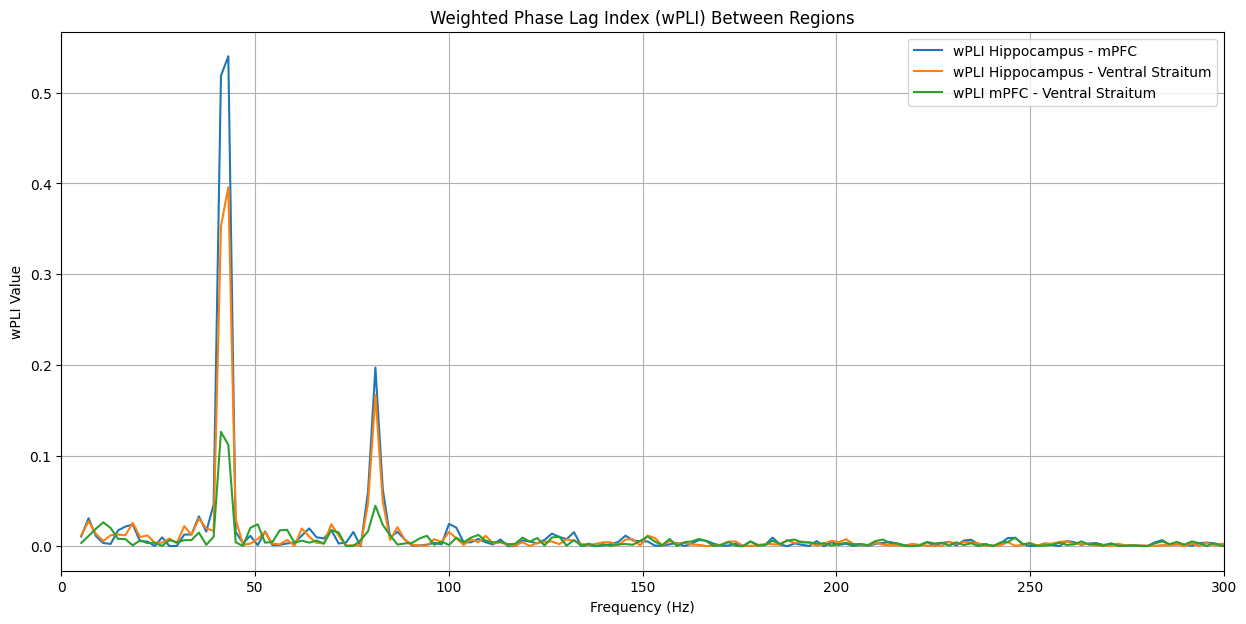

In [120]:
# Initialize an empty dictionary to store wPLI results
wPLI_results = {}
# Compute the wPLI for each pair of regions
for i in range(3):
    for j in range(i + 1, 3):
        num_total = 0
        denom_total = 0
        for trial1 in region_normalized_trials[i]:
            for trial2 in region_normalized_trials[j]:
                num, denom = WPLI(trial1, trial2)
                num_total += num
                denom_total += denom
        wPLI_results[(i, j)] = np.abs(num_total) / denom_total

frequencies = np.linspace(1, 300, 513)

# Plotting the wPLI for each pair of regions
plt.figure(figsize=(15, 7))

# Assuming regions list contains region names in the same order as region_normalized_trials
frequencies *= (13/4)

for (i, j), wPLI in wPLI_results.items():
    plt.plot(frequencies, wPLI, label=f'wPLI {regions[i][1]} - {regions[j][1]}')

plt.title('Weighted Phase Lag Index (wPLI) Between Regions')
plt.xlabel('Frequency (Hz)')
plt.ylabel('wPLI Value')
plt.xlim(0, 300)
plt.legend()
plt.grid(True)
plt.show()